In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r"E:\Downloads\productivity+prediction+of+garment+employees\garments_worker_productivity.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
# Display basic information about the dataset
print("Dataset Information:")
df.info()

# Display summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
df.describe()

# Display unique values for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print("\nUnique Values for Categorical Features:")
for col in categorical_features:
    print(f"{col}: {df[col].unique()}")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-nul

In [6]:
# Check for missing values
print("Missing Values Before Handling:")
print(df.isnull().sum())

# Fill missing values in 'wip' with the median
df['wip'] = df['wip'].fillna(df['wip'].median())

# Verify missing values are handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Missing Values After Handling:
date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


In [8]:
# Define a function to handle outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Clip outliers
    df[column] = np.clip(df[column], lower_bound, upper_bound)

# Handle outliers for specific columns
outlier_columns = ['idle_time', 'incentive', 'actual_productivity']
for col in outlier_columns:
    remove_outliers(df, col)

# Verify outliers are handled
print("\nOutliers handled for columns:", outlier_columns)



Outliers handled for columns: ['idle_time', 'incentive', 'actual_productivity']


In [10]:
# One-hot encode categorical features
categorical_features = ['quarter', 'department', 'day']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Extract date-related features
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

# Drop original 'date' column
df.drop(columns=['date'], inplace=True)

# Verify transformed dataset
df_encoded.head()


,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1/1/2015,8,0.80,26.16,1108.0,7080,98,0.0,0,0,...,False,False,False,False,True,False,False,True,False,False
1,1/1/2015,1,0.75,3.94,1039.0,960,0,0.0,0,0,...,False,False,False,True,False,False,False,True,False,False
2,1/1/2015,11,0.80,11.41,968.0,3660,50,0.0,0,0,...,False,False,False,False,True,False,False,True,False,False
3,1/1/2015,12,0.80,11.41,968.0,3660,50,0.0,0,0,...,False,False,False,False,True,False,False,True,False,False
4,1/1/2015,6,0.80,25.90,1170.0,1920,50,0.0,0,0,...,False,False,False,False,True,False,False,True,False,False


In [12]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['smv', 'wip', 'over_time', 'incentive', 'idle_time', 'actual_productivity']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Display preprocessed data
df_encoded.head()


,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1/1/2015,8,0.80,1.014552,-0.013197,0.750589,2.259493,0.0,0,0,...,False,False,False,False,True,False,False,True,False,False
1,1/1/2015,1,0.75,-1.016778,-0.062587,-1.077682,-0.846671,0.0,0,0,...,False,False,False,True,False,False,False,True,False,False
2,1/1/2015,11,0.80,-0.333878,-0.113407,-0.271092,0.738107,0.0,0,0,...,False,False,False,False,True,False,False,True,False,False
3,1/1/2015,12,0.80,-0.333878,-0.113407,-0.271092,0.738107,0.0,0,0,...,False,False,False,False,True,False,False,True,False,False
4,1/1/2015,6,0.80,0.990783,0.031181,-0.790895,0.738107,0.0,0,0,...,False,False,False,False,True,False,False,True,False,False


In [14]:
# Save the cleaned and preprocessed dataset
output_path = r"E:\Downloads\productivity+prediction+of+garment+employees\cleaned_garments_worker_productivity.csv"
df_encoded.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")


Cleaned dataset saved to E:\Downloads\productivity+prediction+of+garment+employees\cleaned_garments_worker_productivity.csv


In [31]:
#WEEK 2

In [27]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = r"E:\Downloads\productivity+prediction+of+garment+employees\cleaned_garments_worker_productivity.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1/1/2015,8,0.80,1.014552,-0.013197,0.750589,2.259493,0.0,0,0,...,False,False,False,False,True,False,False,True,False,False
1,1/1/2015,1,0.75,-1.016778,-0.062587,-1.077682,-0.846671,0.0,0,0,...,False,False,False,True,False,False,False,True,False,False
2,1/1/2015,11,0.80,-0.333878,-0.113407,-0.271092,0.738107,0.0,0,0,...,False,False,False,False,True,False,False,True,False,False
3,1/1/2015,12,0.80,-0.333878,-0.113407,-0.271092,0.738107,0.0,0,0,...,False,False,False,False,True,False,False,True,False,False
4,1/1/2015,6,0.80,0.990783,0.031181,-0.790895,0.738107,0.0,0,0,...,False,False,False,False,True,False,False,True,False,False


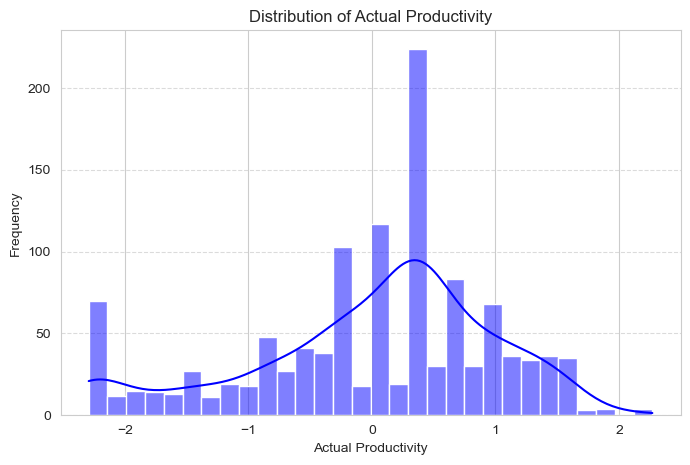

In [29]:
# Plot the distribution of actual_productivity
plt.figure(figsize=(8, 5))
sns.histplot(df['actual_productivity'], kde=True, color='blue', bins=30)
plt.title('Distribution of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


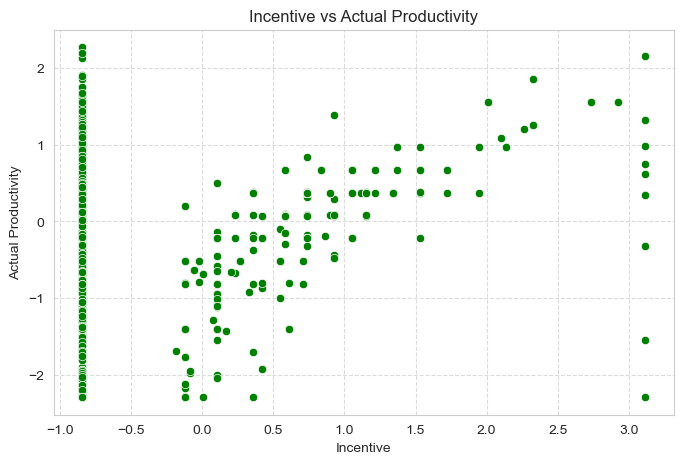

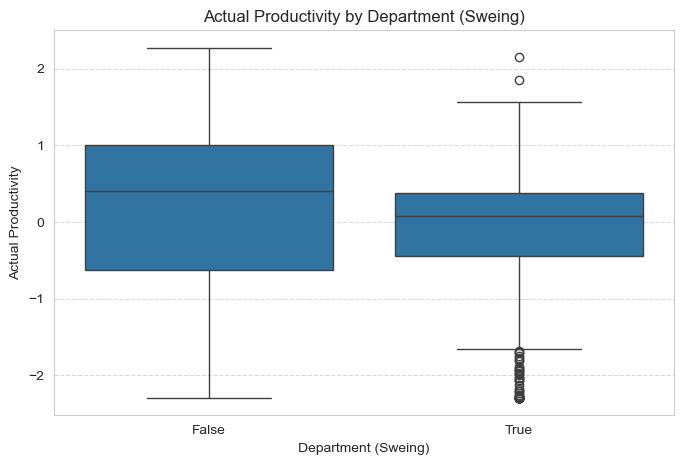

In [33]:
# Scatter plot: actual_productivity vs incentive
plt.figure(figsize=(8, 5))
sns.scatterplot(x='incentive', y='actual_productivity', data=df, color='green')
plt.title('Incentive vs Actual Productivity')
plt.xlabel('Incentive')
plt.ylabel('Actual Productivity')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Box plot: actual_productivity by department
plt.figure(figsize=(8, 5))
sns.boxplot(x='department_sweing', y='actual_productivity', data=df)
plt.title('Actual Productivity by Department (Sweing)')
plt.xlabel('Department (Sweing)')
plt.ylabel('Actual Productivity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')


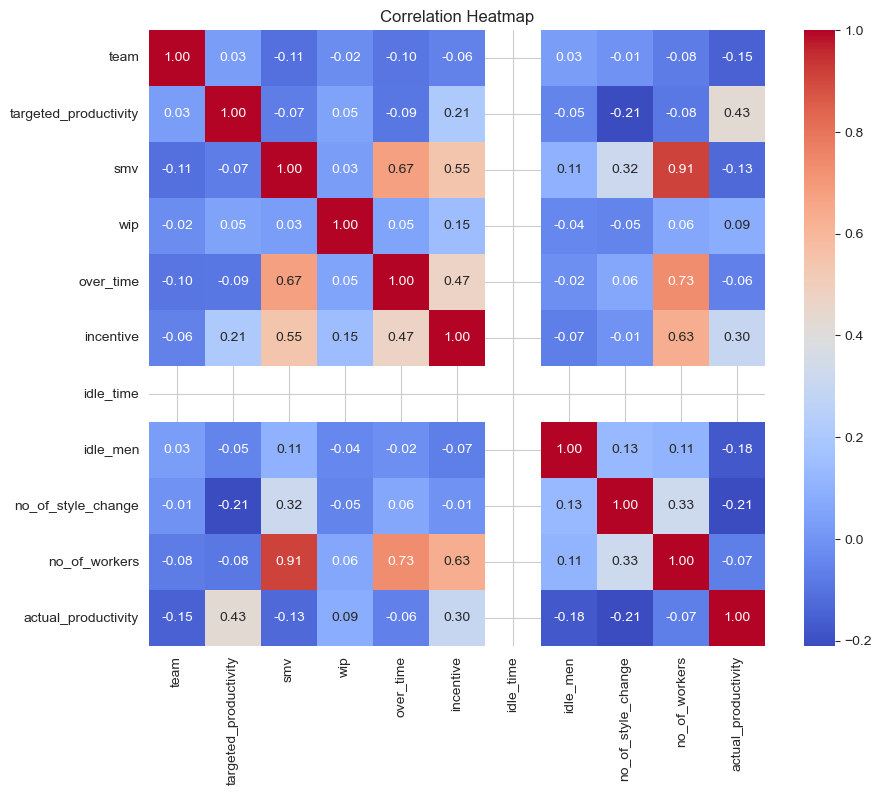

In [43]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check for any non-numeric columns remaining
print(numeric_df.columns)

# Now calculate the correlation matrix on numeric columns only
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()


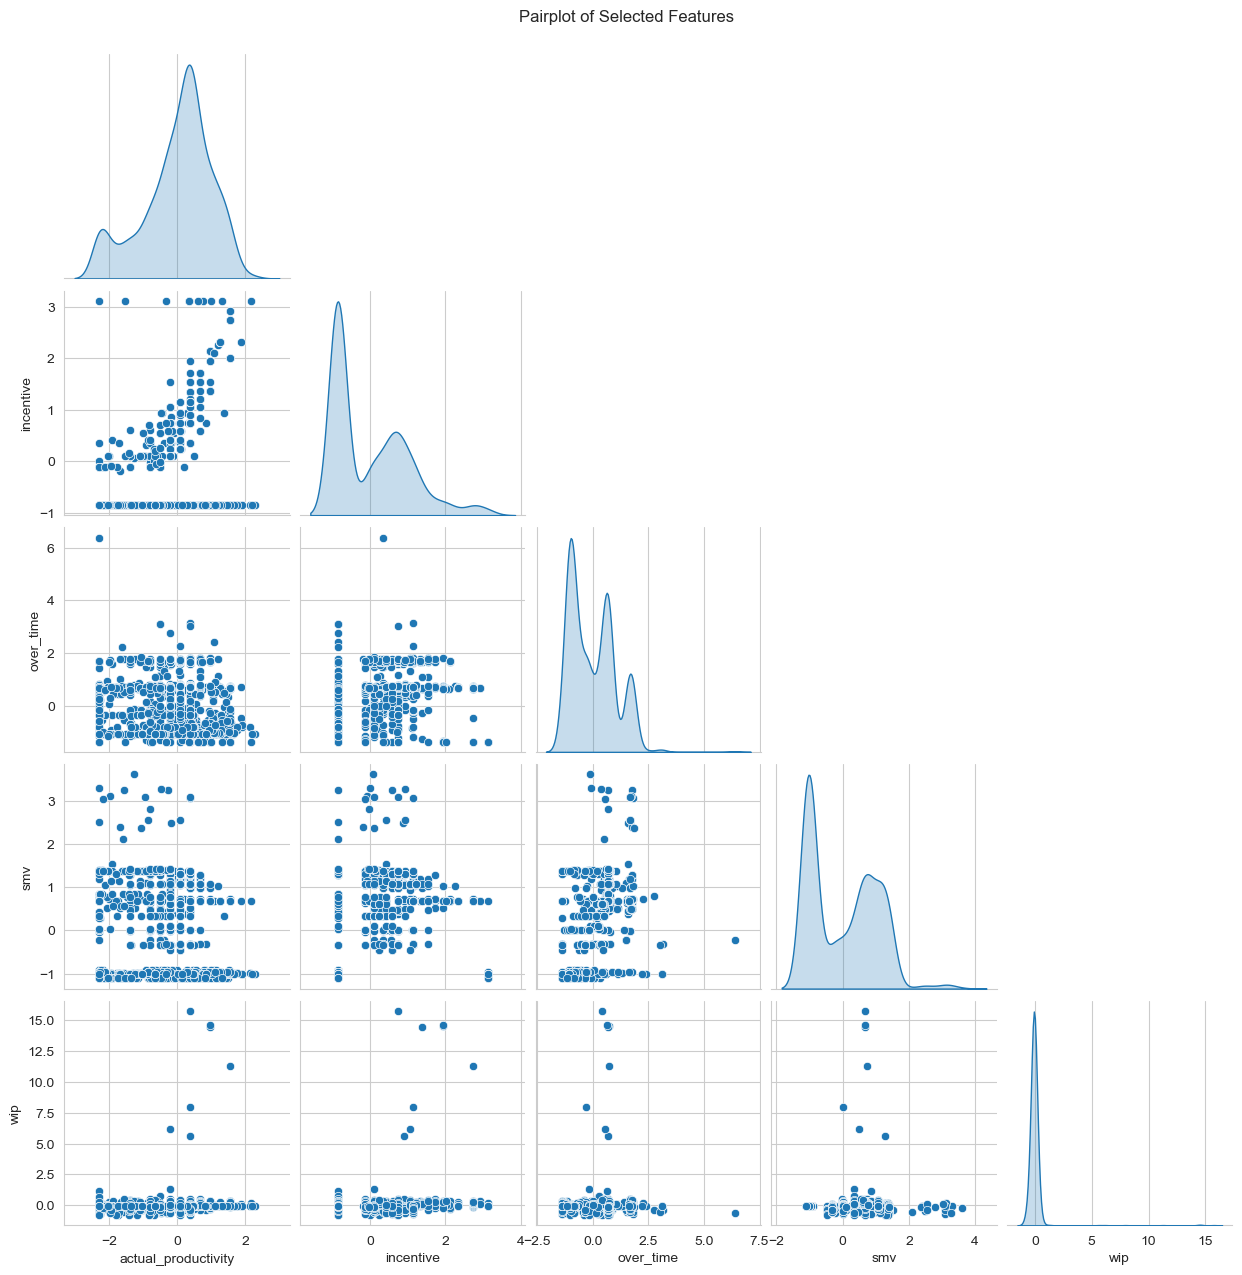

In [39]:
# Select features for pairplot
selected_features = ['actual_productivity', 'incentive', 'over_time', 'smv', 'wip']

# Create a pairplot
sns.pairplot(df[selected_features], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


In [45]:
# Select only numeric columns to calculate correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix (optional, for checking)
print(correlation_matrix)

# Correlation with 'actual_productivity'
correlations = correlation_matrix['actual_productivity'].sort_values(ascending=False)

# Display the correlations
print("\nFeatures Correlated with Actual Productivity:")
print(correlations)


                           team  targeted_productivity       smv       wip  \
team                   1.000000               0.030274 -0.110011 -0.023647   
targeted_productivity  0.030274               1.000000 -0.069489  0.045428   
smv                   -0.110011              -0.069489  1.000000  0.028526   
wip                   -0.023647               0.045428  0.028526  1.000000   
over_time             -0.096737              -0.088557  0.674887  0.050755   
incentive             -0.058481               0.208519  0.545063  0.146048   
idle_time                   NaN                    NaN       NaN       NaN   
idle_men               0.026974              -0.053818  0.105901 -0.043241   
no_of_style_change    -0.011194              -0.209294  0.315388 -0.052790   
no_of_workers         -0.075113              -0.084288  0.912176  0.060086   
actual_productivity   -0.151302               0.426405 -0.129234  0.085862   

                       over_time  incentive  idle_time  idle_me

In [47]:
# Summary of insights
print("Summary of Insights:")

# Print correlations with 'actual_productivity'
print("\nFeatures Correlated with Actual Productivity:")
print(correlations)

# Key visual insights based on plots
print("\nKey Visual Insights:")
print("- 'Incentive' shows a positive trend with 'actual_productivity'.")
print("- Certain departments may have a higher impact on productivity.")
print("- Outliers and spread in 'actual_productivity' vary across features.")


Summary of Insights:

Features Correlated with Actual Productivity:
actual_productivity      1.000000
targeted_productivity    0.426405
incentive                0.298994
wip                      0.085862
over_time               -0.061638
no_of_workers           -0.065212
smv                     -0.129234
team                    -0.151302
idle_men                -0.176100
no_of_style_change      -0.210850
idle_time                     NaN
Name: actual_productivity, dtype: float64

Key Visual Insights:
- 'Incentive' shows a positive trend with 'actual_productivity'.
- Certain departments may have a higher impact on productivity.
- Outliers and spread in 'actual_productivity' vary across features.


In [49]:
# Week 3

In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Handling missing data: Fill missing numeric values with 0
df.fillna(0, inplace=True)

# Define feature columns and target variable
features = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']
target = 'actual_productivity'

# Split data into features (X) and target (y)
X = df[features]
y = df[target]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Linear Regression
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluate the model
print("Linear Regression:")
print(f"MAE (Train): {mean_absolute_error(y_train, y_train_pred)}")
print(f"MSE (Train): {mean_squared_error(y_train, y_train_pred)}")
print(f"R² (Train): {r2_score(y_train, y_train_pred)}")
print(f"MAE (Test): {mean_absolute_error(y_test, y_test_pred)}")
print(f"MSE (Test): {mean_squared_error(y_test, y_test_pred)}")
print(f"R² (Test): {r2_score(y_test, y_test_pred)}")


Linear Regression:
MAE (Train): 0.609835427975008
MSE (Train): 0.7050984127176181
R² (Train): 0.31474103821759547
MAE (Test): 0.5650758090185365
MSE (Test): 0.6118548837449186
R² (Test): 0.3049171457483396


In [59]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Evaluate Ridge Regression
print("Ridge Regression:")
print(f"MAE (Train): {mean_absolute_error(y_train, ridge.predict(X_train))}")
print(f"MSE (Train): {mean_squared_error(y_train, ridge.predict(X_train))}")
print(f"R² (Train): {r2_score(y_train, ridge.predict(X_train))}")

print("\nLasso Regression:")
print(f"MAE (Train): {mean_absolute_error(y_train, lasso.predict(X_train))}")
print(f"MSE (Train): {mean_squared_error(y_train, lasso.predict(X_train))}")
print(f"R² (Train): {r2_score(y_train, lasso.predict(X_train))}")


Ridge Regression:
MAE (Train): 0.614458602886811
MSE (Train): 0.7061927490964761
R² (Train): 0.31367749333181616

Lasso Regression:
MAE (Train): 0.6982374934827358
MSE (Train): 0.8423850719482754
R² (Train): 0.18131723258402432


In [61]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Evaluate the model
print("Random Forest Regressor:")
print(f"MAE (Train): {mean_absolute_error(y_train, rf.predict(X_train))}")
print(f"MSE (Train): {mean_squared_error(y_train, rf.predict(X_train))}")
print(f"R² (Train): {r2_score(y_train, rf.predict(X_train))}")


Random Forest Regressor:
MAE (Train): 0.3045935175795801
MSE (Train): 0.2701577651235858
R² (Train): 0.7374437010395254


In [63]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)

# Train the model
gb.fit(X_train, y_train)

# Evaluate the model
print("Gradient Boosting Regressor:")
print(f"MAE (Train): {mean_absolute_error(y_train, gb.predict(X_train))}")
print(f"MSE (Train): {mean_squared_error(y_train, gb.predict(X_train))}")
print(f"R² (Train): {r2_score(y_train, gb.predict(X_train))}")


Gradient Boosting Regressor:
MAE (Train): 0.3865047307333555
MSE (Train): 0.37615671071552237
R² (Train): 0.634427262346378


In [71]:
import xgboost as xgb

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Evaluate the model
print("XGBoost Regressor:")
print(f"MAE (Train): {mean_absolute_error(y_train, xgb_model.predict(X_train))}")
print(f"MSE (Train): {mean_squared_error(y_train, xgb_model.predict(X_train))}")
print(f"R² (Train): {r2_score(y_train, xgb_model.predict(X_train))}")


XGBoost Regressor:
MAE (Train): 0.39424577274010103
MSE (Train): 0.38573091739768406
R² (Train): 0.6251224464333462


In [67]:
from sklearn.svm import SVR

# Initialize Support Vector Regressor
svr = SVR(kernel='linear')

# Train the model
svr.fit(X_train, y_train)

# Evaluate the model
print("Support Vector Regressor:")
print(f"MAE (Train): {mean_absolute_error(y_train, svr.predict(X_train))}")
print(f"MSE (Train): {mean_squared_error(y_train, svr.predict(X_train))}")
print(f"R² (Train): {r2_score(y_train, svr.predict(X_train))}")


Support Vector Regressor:
MAE (Train): 0.5904986967588247
MSE (Train): 0.7230784148228768
R² (Train): 0.2972669419024342


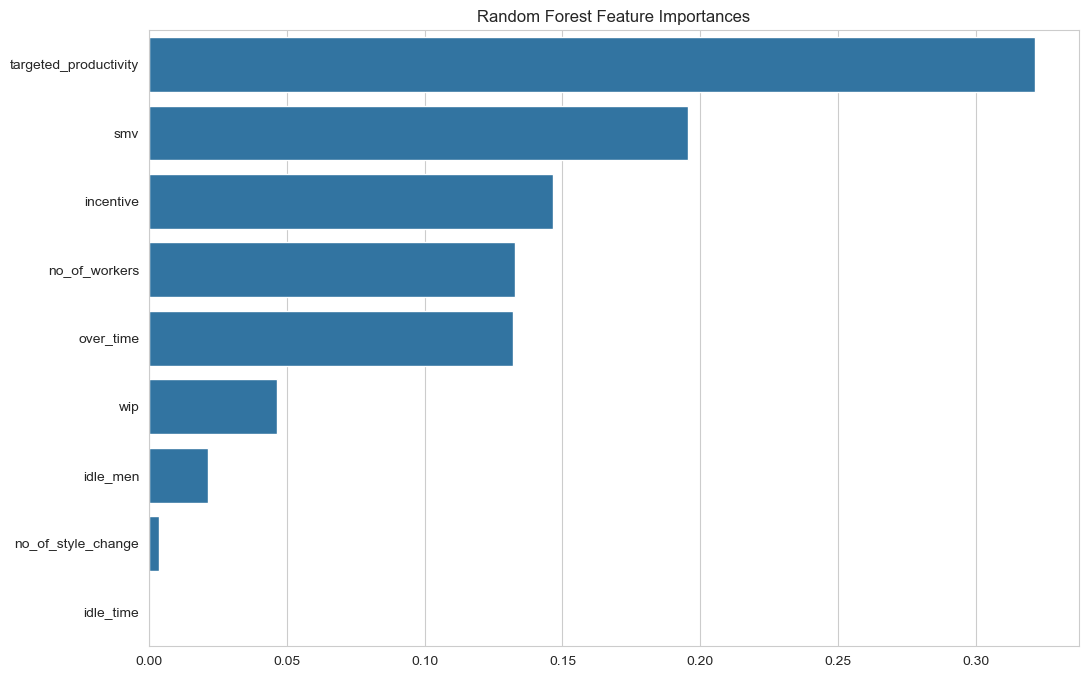

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importances for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features_sorted = [features[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title('Random Forest Feature Importances')
sns.barplot(x=importances[indices], y=features_sorted)
plt.show()


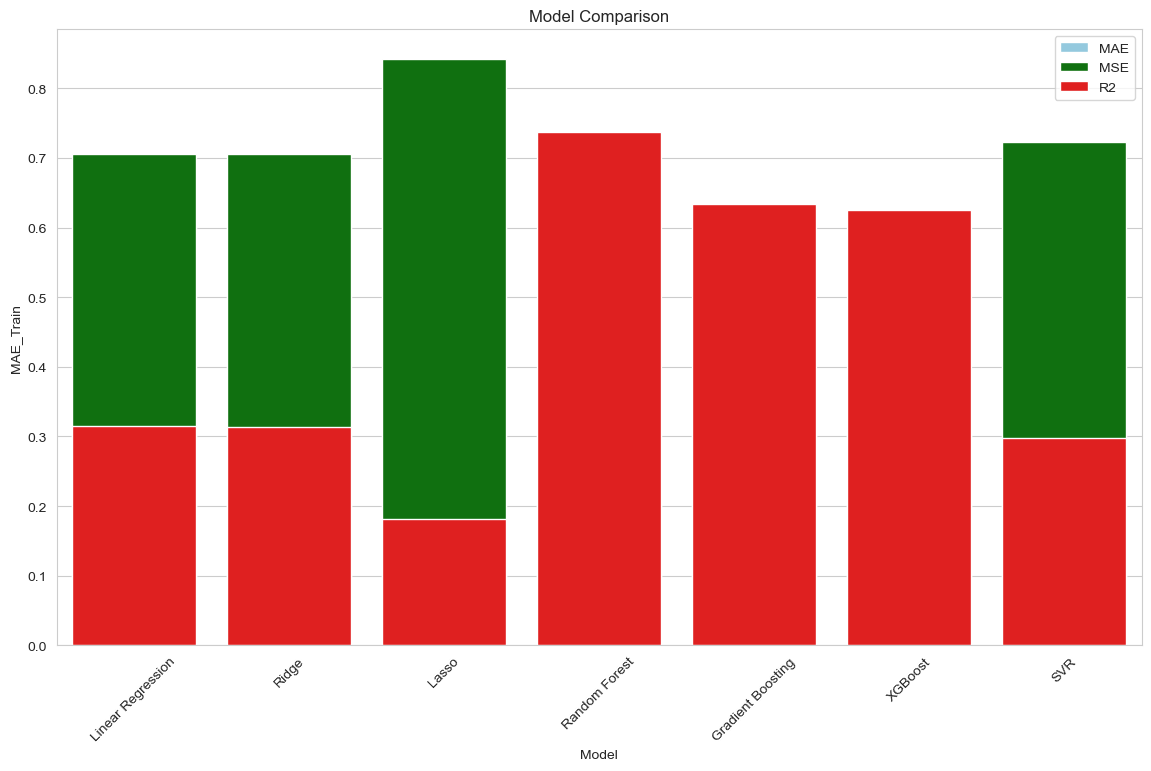

In [75]:
# Create a DataFrame for easier comparison
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'SVR'],
    'MAE_Train': [mean_absolute_error(y_train, lr.predict(X_train)),
                  mean_absolute_error(y_train, ridge.predict(X_train)),
                  mean_absolute_error(y_train, lasso.predict(X_train)),
                  mean_absolute_error(y_train, rf.predict(X_train)),
                  mean_absolute_error(y_train, gb.predict(X_train)),
                  mean_absolute_error(y_train, xgb_model.predict(X_train)),
                  mean_absolute_error(y_train, svr.predict(X_train))],
    'MSE_Train': [mean_squared_error(y_train, lr.predict(X_train)),
                  mean_squared_error(y_train, ridge.predict(X_train)),
                  mean_squared_error(y_train, lasso.predict(X_train)),
                  mean_squared_error(y_train, rf.predict(X_train)),
                  mean_squared_error(y_train, gb.predict(X_train)),
                  mean_squared_error(y_train, xgb_model.predict(X_train)),
                  mean_squared_error(y_train, svr.predict(X_train))],
    'R2_Train': [r2_score(y_train, lr.predict(X_train)),
                 r2_score(y_train, ridge.predict(X_train)),
                 r2_score(y_train, lasso.predict(X_train)),
                 r2_score(y_train, rf.predict(X_train)),
                 r2_score(y_train, gb.predict(X_train)),
                 r2_score(y_train, xgb_model.predict(X_train)),
                 r2_score(y_train, svr.predict(X_train))],
})

# Plotting the comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='MAE_Train', data=metrics_df, color='skyblue', label='MAE')
sns.barplot(x='Model', y='MSE_Train', data=metrics_df, color='green', label='MSE')
sns.barplot(x='Model', y='R2_Train', data=metrics_df, color='red', label='R2')
plt.xticks(rotation=45)
plt.title('Model Comparison')
plt.legend()
plt.show()


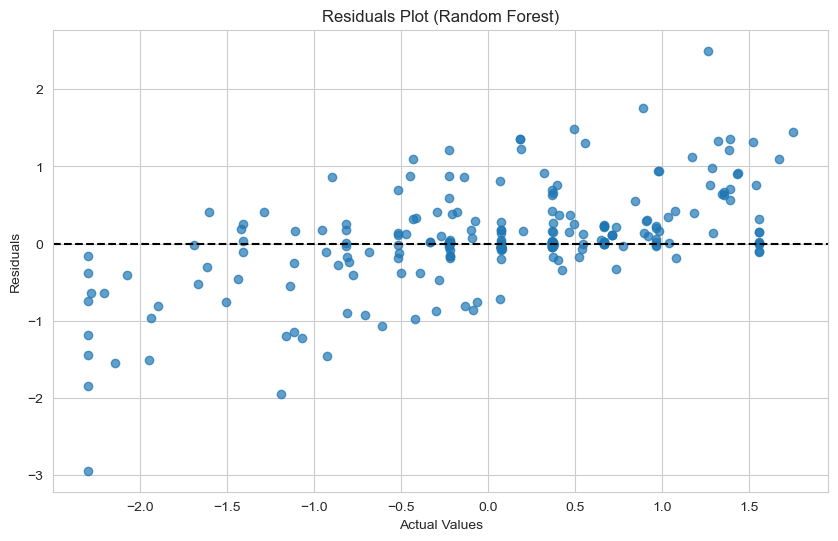

In [77]:
# Plot residuals for a model (e.g., Random Forest)
residuals = y_test - rf.predict(X_test)

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals Plot (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


In [79]:
# Week 4

In [81]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define hyperparameters for the models
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100]
}

param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100]
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

param_grid_svr = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Choose a model and perform GridSearchCV or RandomizedSearchCV
grid_search_rf = RandomizedSearchCV(RandomForestRegressor(), param_grid_rf, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters for Random Forest: ", grid_search_rf.best_params_)

# Evaluate the model
best_rf_model = grid_search_rf.best_estimator_
print(f"MAE (Test): {mean_absolute_error(y_test, best_rf_model.predict(X_test))}")
print(f"MSE (Test): {mean_squared_error(y_test, best_rf_model.predict(X_test))}")
print(f"R² (Test): {r2_score(y_test, best_rf_model.predict(X_test))}")


Best parameters for Random Forest:  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
MAE (Test): 0.4023778971666026
MSE (Test): 0.41478230495933044
R² (Test): 0.528796654102692


In [87]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid for Ridge Regression
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100]
}

# Initialize Ridge regression model
ridge_model = Ridge()

# Perform GridSearchCV for Ridge
grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
print(f"Best parameters for Ridge: {grid_search_ridge.best_params_}")


Best parameters for Ridge: {'alpha': 0.1}


In [89]:
# Get the best model after hyperparameter tuning
best_ridge_model = grid_search_ridge.best_estimator_

# Evaluate the model on the test set
y_pred_ridge = best_ridge_model.predict(X_test)

# Calculate and print the evaluation metrics
print(f"MAE (Test) for Ridge: {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"MSE (Test) for Ridge: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"R² (Test) for Ridge: {r2_score(y_test, y_pred_ridge)}")


MAE (Test) for Ridge: 0.5652067838170911
MSE (Test) for Ridge: 0.6114461889161986
R² (Test) for Ridge: 0.3053814335649636


In [91]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid for Ridge Regression
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100]
}

# Initialize Ridge regression model
ridge_model = Ridge()

# Perform GridSearchCV for Ridge
grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
print(f"Best parameters for Ridge: {grid_search_ridge.best_params_}")

# Get the best model after hyperparameter tuning
best_ridge_model = grid_search_ridge.best_estimator_

# Evaluate the model on the test set
y_pred_ridge = best_ridge_model.predict(X_test)

# Calculate and print the evaluation metrics
print(f"MAE (Test) for Ridge: {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"MSE (Test) for Ridge: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"R² (Test) for Ridge: {r2_score(y_test, y_pred_ridge)}")


Best parameters for Ridge: {'alpha': 0.1}
MAE (Test) for Ridge: 0.5652067838170911
MSE (Test) for Ridge: 0.6114461889161986
R² (Test) for Ridge: 0.3053814335649636
